# Demo: Linear Regression

In [74]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Data Loading and Visualization

In [75]:
# Read salary data
file_path = "https://static.bc-edx.com/mbc/ai/m3/datasets/salary-data.csv"
df_salary = pd.read_csv(file_path)

# Display sample data
df_salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Expected Salary Based on Years of Experience'}, xlabel='years_experience', ylabel='salary'>

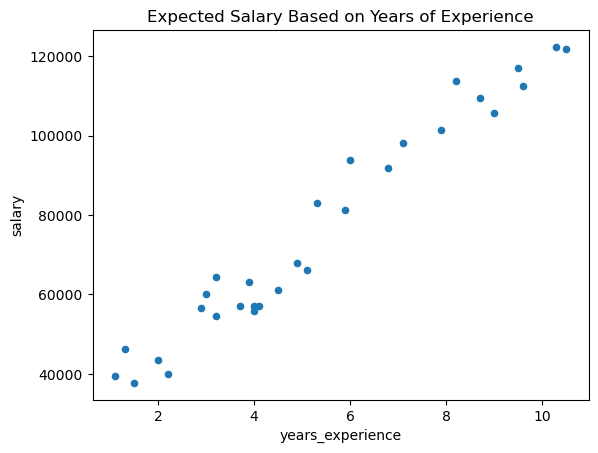

In [76]:
# Create a scatter plot with the salary information
df_salary.plot.scatter( x="years_experience",
                        y="salary",
                        title="Expected Salary Based on Years of Experience",
                        colormap='autumn')

## Data Preparation

In [77]:
df_salary["years_experience"]

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: years_experience, dtype: float64

In [78]:
# Reformat data of the independent variable X as a single-column array
X = df_salary["years_experience"].values.reshape(-1, 1)

# Display sample data
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [79]:
# The shape of X is 30 samples, with a single feature (column)
X[:30]
X.shape

(30, 1)

In [80]:
# Create an array for the dependent variable y
y = df_salary["salary"]

y.shape

(30,)

In [81]:
X[5]
X.shape
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: salary, dtype: float64

## Building the Linear Regression Model

In [82]:
# Create a model with scikit-learn
model = LinearRegression()

In [83]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [84]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [9449.96232146]


In [85]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 25792.20019866871


In [86]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 25792.20019866871 + 9449.962321455074X


In [87]:
# Display the formula to predict the salary for a person with 7 years of experience
print(f"Model's formula: y = mx + b where m is the slope and b is the intercept")

# Predict the salary for a person with 7 years of experience
y_intercept = model.intercept_ + model.coef_[0] * 7

# Display the prediction
print(f"Model's formula: y = {y_intercept}")

Model's formula: y = mx + b where m is the slope and b is the intercept
Model's formula: y = 91941.93644885423


In [88]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [89]:
# Create a copy of the original data
df_salary_predicted = df_salary.copy()

# Add a column with the predicted salary values
df_salary_predicted["salary_predicted"] = predicted_y_values

# Display sample data
df_salary_predicted.head()

,years_experience,salary,salary_predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


<Axes: xlabel='years_experience'>

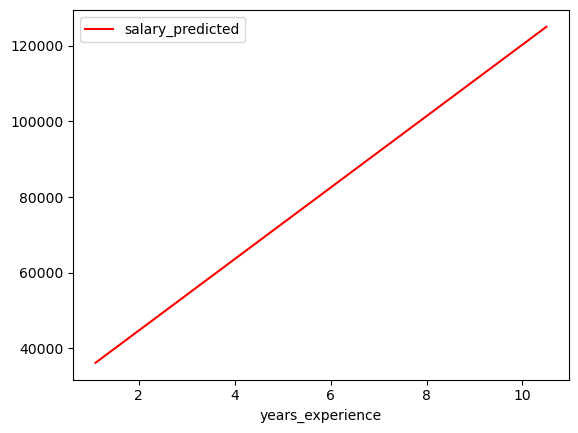

In [90]:
# Create a line plot of the predicted salary values
best_fit_line = df_salary_predicted.plot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red"
)
best_fit_line

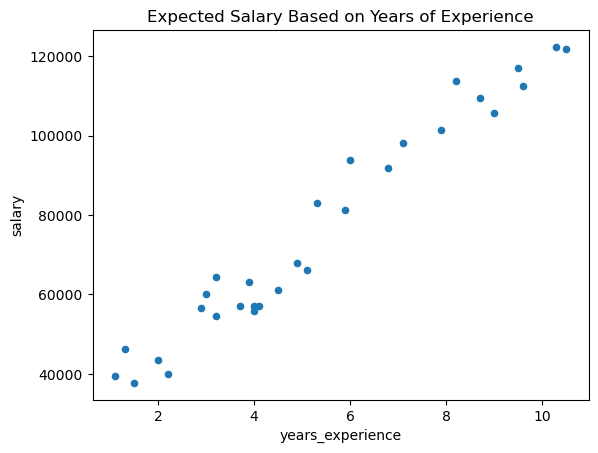

In [91]:
# Plot salary scatter and best fit line together
salary_plot = df_salary_predicted.plot.scatter(
    x="years_experience",
    y="salary",
    title="Expected Salary Based on Years of Experience"
)

<Axes: xlabel='years_experience'>

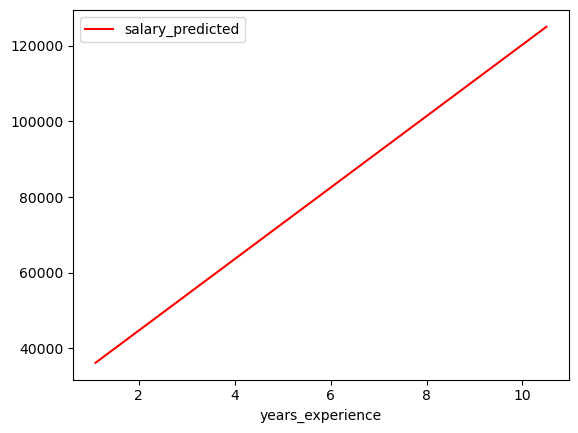

In [92]:
salary_plot = df_salary_predicted.plot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red",

)
salary_plot

## Linear Regression Model Assessment

In [93]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, predicted_y_values),5)
mse = round(mean_squared_error(y, predicted_y_values),4)
rmse = round(np.sqrt(mse),4)

# Print relevant metrics.
print(f"The score is {score}")
print(f"The r2 is {r2}")
print(f"The mean squared error is {mse}")
print(f"The root mean squared error is {rmse}")

The score is 0.95696
The r2 is 0.95696
The mean squared error is 31270951.7223
The root mean squared error is 5592.0436


In [98]:
r2_score(y, predicted_y_values)

0.9569566641435086

In [99]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: salary, dtype: float64

In [100]:
predicted_y_values

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])